In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch import nn
from torch import optim
from tqdm import tqdm

from util.torch_model import LeNetTorch
from util.torch_func import get_semeion_data, val_model, train_model

D:\Learning\Python\env\data\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


$$LeNet$$

In [ ]:
epoch_losses, train_scores, test_scores = [], [], []
num_epoch = 100

In [3]:
model = LeNetTorch(num_classes=10)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train_loader, test_loader = get_semeion_data()


In [4]:
for epoch in tqdm(range(num_epoch)):
    epoch_loss = train_model(model, optimizer, criterion, train_loader)
    epoch_losses.append(np.mean(epoch_loss))
    # 训练集测试精度
    train_score = val_model(model, train_loader)
    train_scores.append(train_score)
    # 验证集测试精度
    test_score = val_model(model, test_loader)
    test_scores.append(test_score)
    # print('epoch: {},train acc: {}, test acc: {}'.format(epoch, train_score, test_score))

100%|██████████| 100/100 [00:56<00:00,  1.78it/s]


$保存数据$

In [5]:
resultData = pd.DataFrame({'epoch_loss': epoch_losses, 'train_score': train_scores, 'test_score': test_scores})
resultData.to_csv(f'./results/{type(model).__name__}-result.csv', index=False)

$绘制图像$

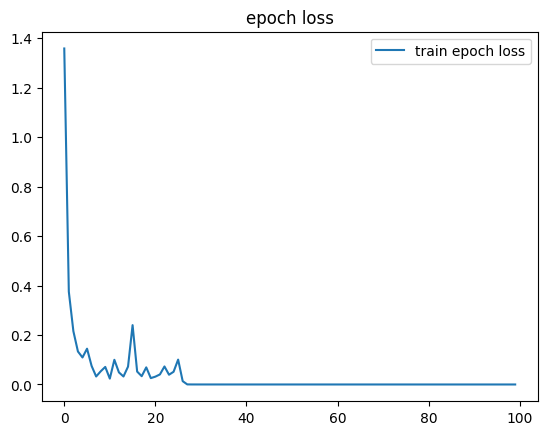

In [6]:
# 训练损失
plt.plot(epoch_losses)
plt.title('epoch loss')
plt.legend(['train epoch loss'])
plt.savefig(f'./results/{type(model).__name__}-epoch_loss.png')
plt.show()

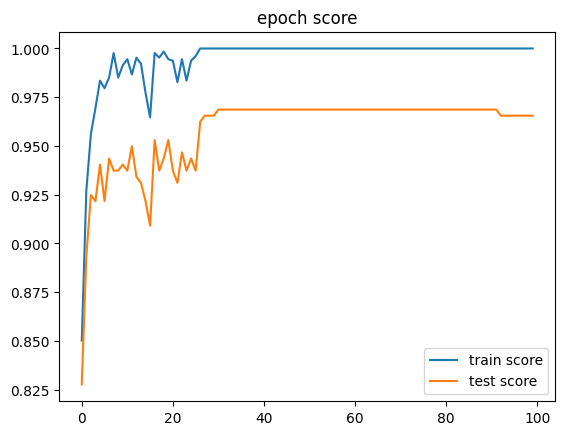

In [7]:
# 训练精度
plt.plot(train_scores, label='train score')
plt.plot(test_scores, label='test score')
plt.title('epoch score')
plt.legend()
plt.savefig(f'./results/{type(model).__name__}-epoch_score.png')
plt.show()